<a href="https://colab.research.google.com/github/MunySafitri/HW-Temu-Kembali-Informasi/blob/main/Transformasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tkinter import N
from turtle import title
import requests
from bs4 import BeautifulSoup

categories =['bisnis', 'hak-asasi-manusia','ilmu-hukum','kekayaan-intelektual','keluarga', 'ketenagakerjaan','perdata','perlindungan-kosumen','pertanahan-properti','pidana','profesi-hukum','start-up-umkm','teknologi']
# categories =['bisnis', 'hak-asasi-manusia','ilmu-hukum']#'kekayaan-intelektual','keluarga', 'ketenagakerjaan','perdata','perlindungan-kosumen','pertanahan-properti','pidana','profesi-hukum','start-up-umkm','teknologi']
kolom1 = []
kolom2 = []
kolom3 = []
kolom4 = []
kolom5 = []
kolom6 = []
kolom7= []
kolom8= []
nomor = [] 
k=1

for j in range(len(categories)):

  for i in range(5):#pengulangan 5 kali halaman setiap kategory
    url = 'https://www.hukumonline.com/klinik/'+categories[j]+'/page/'+str(i)+'/'
    
    #Membuat Requests
    r = requests.get(url)

    #Hasil Response
    request = r.content
    soup = BeautifulSoup(request, 'html.parser')

    #Extract Element
    category = soup.findAll('span', attrs={'class':'d-inline-flex flex-row justify-content-center align-items-center mx-2 badge badge-primary badge-pill'})
    title = soup.findAll('h2', attrs={'class':'header-6 font-weight-bold text-dark'})
    date = soup.findAll('span',attrs={ 'class':'small text-muted mr-1'})
    mitra_author = soup.findAll('a',attrs={'class':"small mx-2 d-none d-md-inline-block"})
    
    #crawling link
    temp =[]
    for a in soup.find_all('a', href=True):
      if 'href' in a.attrs:
        temp.append(a.attrs['href']) #menambahkan link ke kolom7
        # print("Found the URL:", a.attrs['href'])
    
    #menambahkan setiap konten ke kolom masing
    count = 0

    #menambahkan kolom1,kolom2,kolom4,kolom6 dan nomor
    for x in range(0, len(title)):
      count += 1
      kolom1.append(title[x].text.strip())
      kolom2.append(date[x].text.strip())
      kolom4.append(category[x].text.strip())

      #melakukan transformasi pada tanggal
      kolom6.append(date[0].text.strip().split()[2])
      nomor.append(str(k))
      k=k+1

    #menambahkan kolom link (kolom7)
    for link in range(24,len(temp)-47,4):
      kolom7.append('https://www.hukumonline.com'+temp[link]) #menambahkan kolom7
      url2 = 'https://www.hukumonline.com'+temp[link]
      print(url2)
       #Membuat Requests
      r2 = requests.get(url2)

      #Hasil Response
      request2 = r2.content
      soup1 = BeautifulSoup(request2, 'html.parser')
      #extract article
      artikel = soup1.find_all('article',attrs={'class':'undefined article-content-container'})
      tagP=artikel[0].find_all('p')
      text =""
      for p in tagP:
        for i in p.text.strip().split():
          text = text + str(i) + " "
      print(text)
      kolom8.append(text)#menambahkan kolom8

    #menambahkan kolom3 dan kolom4
    for y in range(0,len(mitra_author)-1,2):
      kolom3.append(mitra_author[y].text.strip())#menambahkan kolom3
      kolom5.append(mitra_author[y+1].text.strip())#menambahkan kolom5
      # print("{0}. {1}\n  {2}  \n{3}".format(y,mitra_author[y].text.strip(),mitra_author[y+1].text.strip(),category[x].text.strip()))
      y=y+2
    
    

In [ ]:
#MEMBUAT NAMA FIELD
import numpy as np
data = {'No':nomor,
        'judul_artikel': kolom1,
        'update': kolom2,
        'mitra':kolom3,
        'kategory':kolom4,
        'author':kolom5,
        'tahun' :kolom6,
        'link' :kolom7,
        'isi' :kolom8
       }

In [ ]:
#membuat dataframe
import pandas as pd
df_hasil = pd.DataFrame(data)

In [ ]:
#menyetel index pada field no
df_hasil = df_hasil.set_index('No')
df_hasil.head(12)

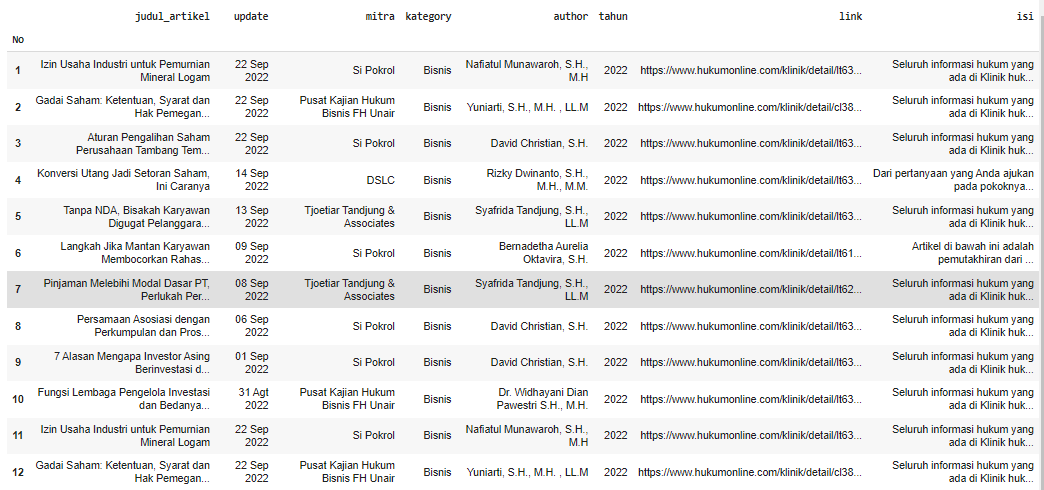

In [ ]:
#import ke format csv
df_hasil.to_csv('hasil-crawling_scrapping-web-hukumOnline-pidana-update.csv')